In [51]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [52]:
df= pd.read_csv("train.csv")

In [53]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
df.Survived.sum()

342

In [55]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [56]:
df.Ticket.value_counts()

1601          7
347082        7
CA. 2343      7
CA 2144       6
3101295       6
             ..
7540          1
364846        1
4137          1
C.A. 31026    1
349208        1
Name: Ticket, Length: 681, dtype: int64

In [57]:
df['title'] = df.Name.str.extract(' ([A-Za-z]+)', expand=False)
df['title']= df['title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
df['title'] = df['title'].replace('Ms', 'Miss')
df['title'] = df['title'].replace('Mme', 'Mrs')
df['title'] = df['title'].replace('Mlle', 'Miss')


In [58]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Cabin']=df['Cabin'].fillna('missing')
df['Cab']=0
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Cab
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,missing,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,missing,S,Miss,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,missing,S,Mr,0


In [59]:
for i in range(0, len(df.Cabin)):
    if df['Cabin'][i]== 'missing':
        df.loc[i, ('Cab')]='Missing'
    else:
        df.loc[i, ('Cab')]=df['Cabin'][i][0]


In [60]:
df1=df.drop(['PassengerId', 'Name', 'Ticket','Cabin'],axis=1)

In [61]:
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,title,Cab
0,0,3,1,22.0,1,0,7.2500,S,Mr,Missing
1,1,1,0,38.0,1,0,71.2833,C,Mrs,C
2,1,3,0,26.0,0,0,7.9250,S,Miss,Missing
3,1,1,0,35.0,1,0,53.1000,S,Mrs,C
4,0,3,1,35.0,0,0,8.0500,S,Mr,Missing


In [62]:
# df1['Family']= df1['SibSp']+df1['Parch']
# df1=df1.drop(['SibSp','Parch'], axis=1)
# df1.head()
# df1.title.value_counts()
# df1.groupby(by=["Cab"]).sum()
df1['Survived'].skew()

0.4785234382949897

In [63]:
def onehotencoding(dataf,X):
    dummy=pd.get_dummies(dataf[X])
    df0=pd.concat([dataf,dummy],axis=1)
    df0=df0.drop([X,dummy.columns[-1]],axis=1)
    return df0

In [64]:
df1=onehotencoding(df1, 'Cab')
df1=onehotencoding(df1,'Embarked')
df1=onehotencoding(df1,'title')

In [81]:
df1.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'A', 'B',
       'C', 'D', 'E', 'F', 'G', 'Missing', 'C', 'Q', 'Billiard', 'Carlo',
       'Cruyssen', 'Gordon', 'Impe', 'Master', 'Melkebeke', 'Messemaeker',
       'Miss', 'Mr', 'Mrs', 'Mulder', 'Others', 'Pelsmaeker', 'Planke',
       'Shawah', 'Steen', 'Velde', 'Walle', 'der', 'the'],
      dtype='object')

<AxesSubplot:>

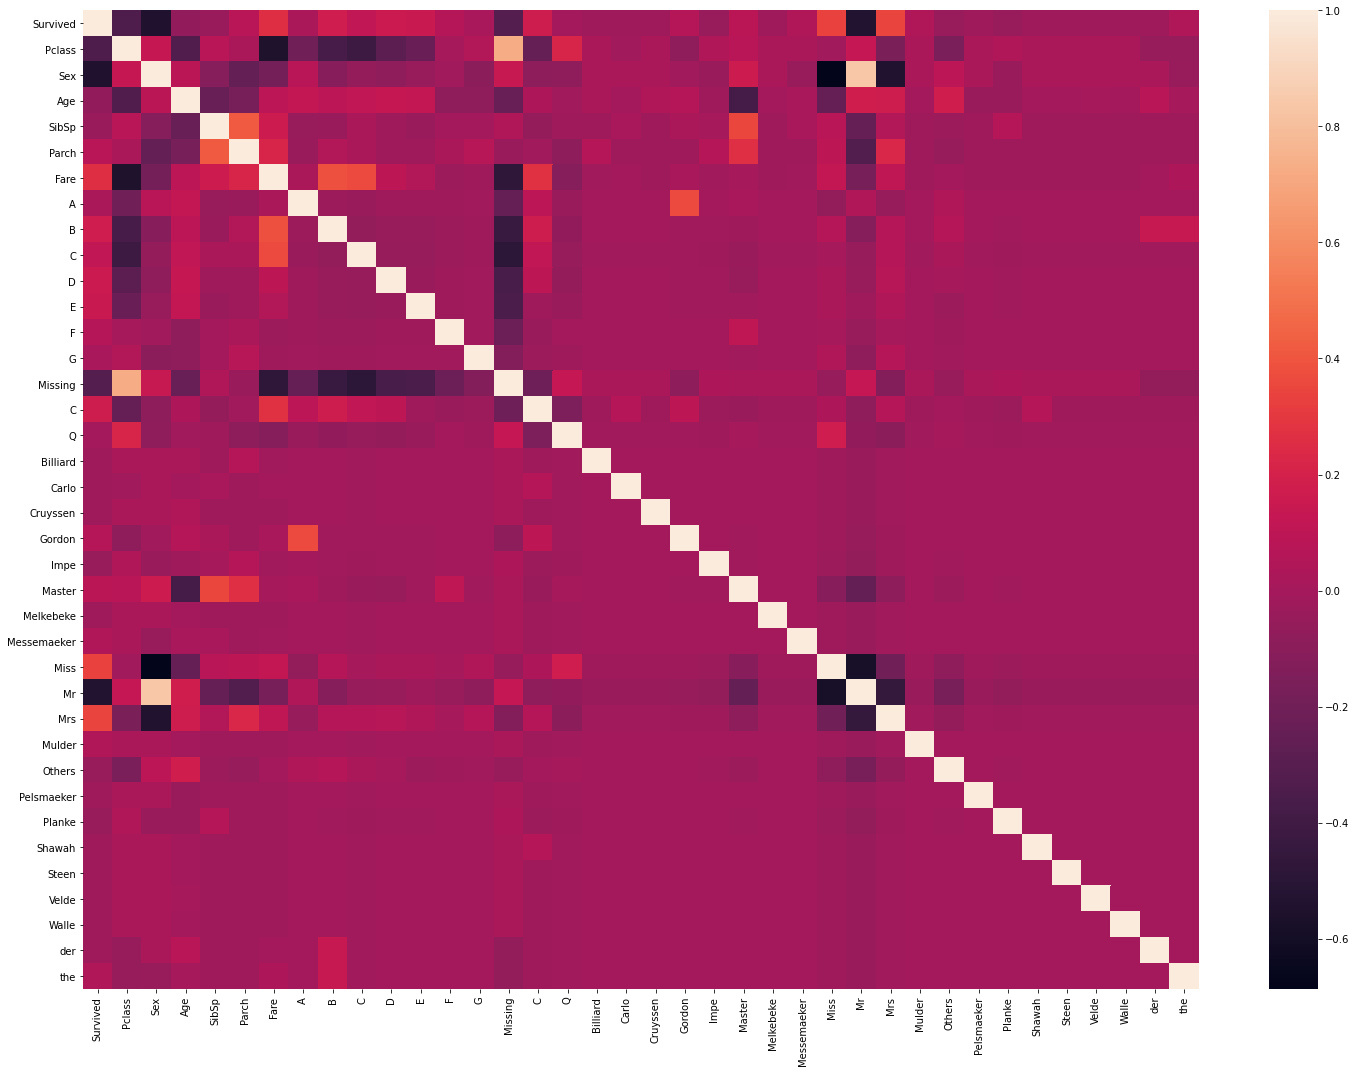

In [93]:
# import seaborn as sns
fig, ax = plt.subplots(figsize=(25,18))
sns.heatmap(df1.corr())
# for columns in df1.columns:
# plt.hist(df1.Survived)

In [16]:
X=df1.drop(['Survived'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.03352008,
        -0.03352008, -0.06715343],
       [-1.56610693, -1.35557354,  0.63878901, ..., -0.03352008,
        -0.03352008, -0.06715343],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.03352008,
        -0.03352008, -0.06715343],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ..., -0.03352008,
        -0.03352008, -0.06715343],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.03352008,
        -0.03352008, -0.06715343],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.03352008,
        -0.03352008, -0.06715343]])

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=12, svd_solver= 'full')
pca = PCA(n_components=12).fit(X)
print(pca.explained_variance_ratio_.sum())
Principal_components=pca.transform(X)
pca_df = pd.DataFrame(data = Principal_components)
pca_df.head(5)

0.501711306129253


,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.774090,0.111445,0.519807,-0.090782,-0.074055,0.270299,-0.248100,0.070247,-0.074984,-0.015742,0.009999,-0.033147
1,3.195496,0.342166,-0.412975,-0.857012,0.623783,-1.711172,-0.568061,-0.305846,-0.042809,0.335726,-0.178152,0.098437
2,0.329244,-2.033295,-0.606655,-0.809500,-0.658057,1.432222,0.373907,0.242515,0.076841,-0.242072,0.128773,0.022514
3,2.789049,0.333144,0.648533,-1.744197,0.321586,-1.056135,-0.308979,-0.270043,-0.076677,0.207104,-0.171800,0.103643
4,-1.757029,0.649582,0.033952,-0.447080,-0.002910,0.256516,-0.111874,-0.017580,-0.092155,0.004529,0.030801,0.005599


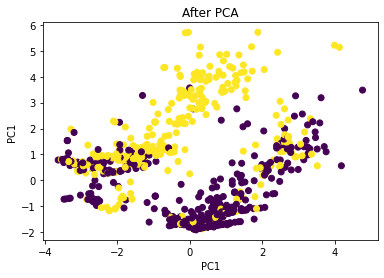

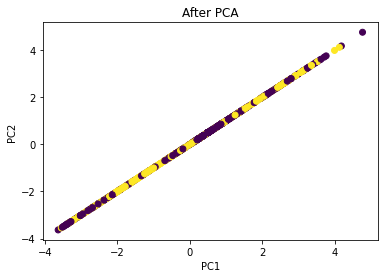

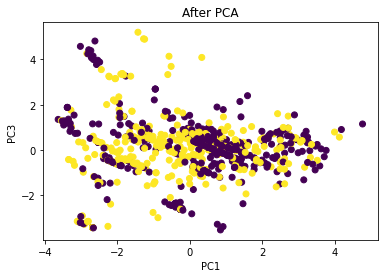

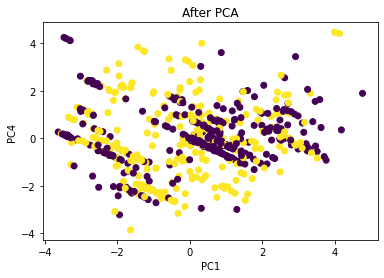

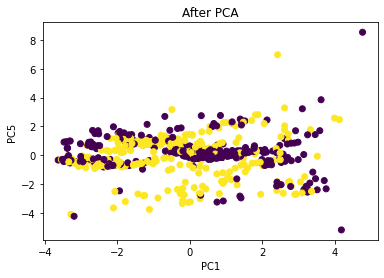

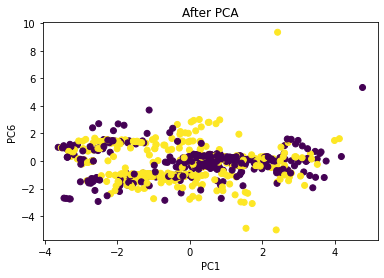

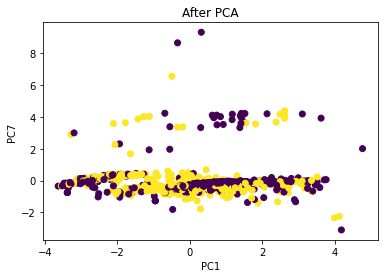

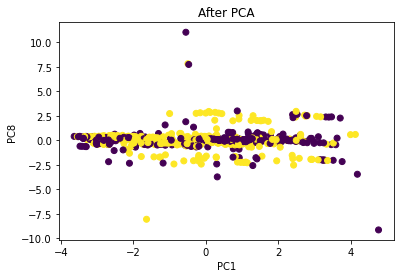

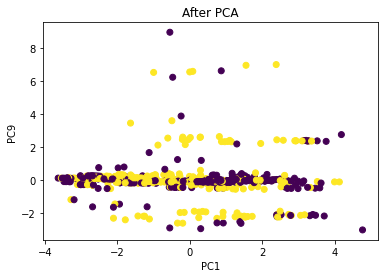

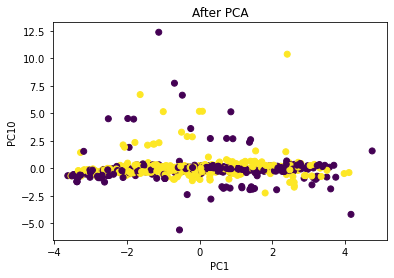

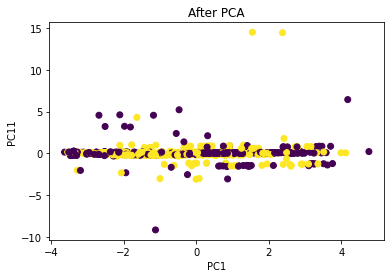

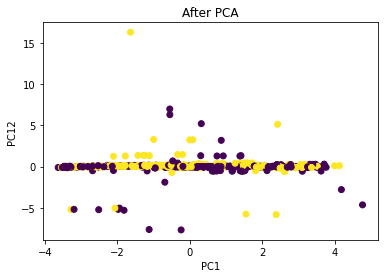

In [18]:
# fig, axes = plt.subplots(1,2)
# plt.scatter(X[:,0], X[:,1], c=df1.Survived)
# plt.xlabel('x1')
# plt.ylabel('x2')
# plt.title('Before PCA')
for i in range(0,12):
    plt.scatter(Principal_components[:,1], Principal_components[:,i],c=df1.Survived)
    plt.xlabel('PC1')
    plt.ylabel('PC'+ str(i+1))
    plt.title('After PCA')
    plt.show()

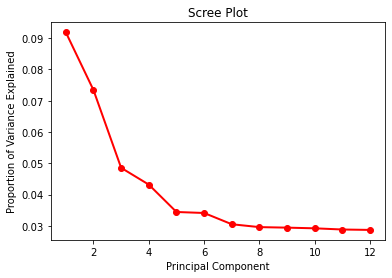

In [19]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [20]:
cov_mat = np.cov(X.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 3.85789355e-01  3.35971503e-01 -4.90376945e-02 ... -3.05935361e-12
   3.54592652e-12  8.87864221e-13]
 [ 3.89191740e-01 -3.61049965e-01  1.46165260e-01 ... -1.41771684e-12
   1.64365934e-12  4.08405233e-13]
 [-8.54898730e-02 -3.73434859e-01 -2.47778465e-01 ... -7.76373853e-15
   1.98382115e-14 -3.41618114e-15]
 ...
 [-3.63809610e-02 -6.15840583e-02  5.65652578e-03 ... -5.48615911e-10
   6.34555822e-10  1.60215099e-10]
 [-5.16138730e-02 -3.13621342e-02  2.23204083e-02 ...  5.53863838e-10
  -6.40649286e-10 -1.61801773e-10]
 [-3.56132498e-02  6.80575871e-04 -3.65982591e-02 ... -8.77065737e-12
   1.02433846e-11  2.67396058e-12]]

Eigenvalues 
[3.21967146e+00 2.57229605e+00 1.70680836e+00 1.68960230e-03
 1.18857805e-02 1.43201595e-01 1.51686503e+00 2.91635148e-01
 3.74678872e-01 4.65554518e-01 5.13382625e-01 6.56984934e-01
 1.21340139e+00 1.20665467e+00 9.21464634e-01 1.08522580e+00
 1.07103499e+00 9.53691558e-01 1.03936484e+00 1.03489682e+00
 1.01164922e+00 9.95386079e-01 